# Corporación Favorita Grocery Sales Forecasting
This notebook uses a dataset from [Kaggle's Corporación Favorita Grocery Sales Forecasting](https://www.kaggle.com/c/favorita-grocery-sales-forecasting) competition:
> In this competition, Corporación Favorita has challenged the Kaggle community to build a model that more accurately forecasts product sales. They currently rely on subjective forecasting methods with very little data to back them up and very little automation to execute plans. They’re excited to see how machine learning could better ensure they please customers by having just enough of the right products at the right time.

## Load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Train set

In [22]:
df_train = pd.read_csv(
    'train.csv', usecols=[1, 2, 3, 4, 5], dtype={'onpromotion': str},
    converters={'unit_sales': lambda u: float(u) if float(u) > 0 else 0},
    skiprows=range(1, 124035460))

print('Size of training set: {} rows and {} columns'.format(*df_train.shape))
df_train.head()

Size of training set: 1461581 rows and 5 columns


,date,store_nbr,item_nbr,unit_sales,onpromotion
0,2017-08-02,1,96995,1.0,False
1,2017-08-02,1,103520,1.0,False
2,2017-08-02,1,103665,2.0,False
3,2017-08-02,1,105574,8.0,False
4,2017-08-02,1,105575,8.0,False


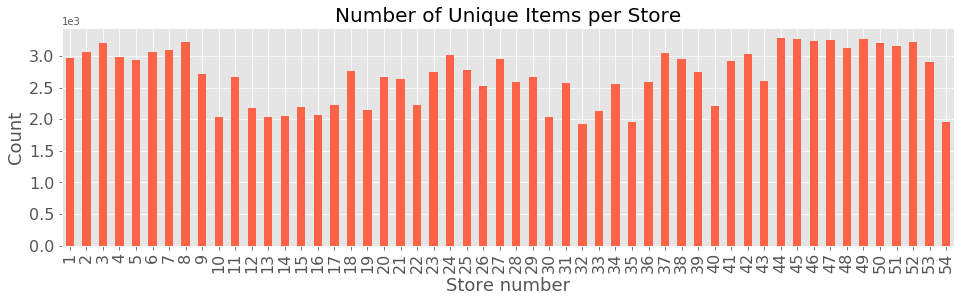

In [28]:
df_train.groupby('store_nbr').agg({'item_nbr': lambda x: x.nunique()}).plot(
    kind='bar',
    figsize=(16, 4), 
    legend=False,
    fontsize=16,
    color='tomato')

plt.ticklabel_format(style='sci', scilimits=(0,0), axis='y')
plt.xlabel('Store number', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Number of Unique Items per Store', fontsize=20)
plt.show()

In [24]:
df_train.unit_sales.describe()

count    1.461581e+06
mean     7.830799e+00
std      2.160031e+01
min      0.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      8.000000e+00
max      4.908000e+03
Name: unit_sales, dtype: float64

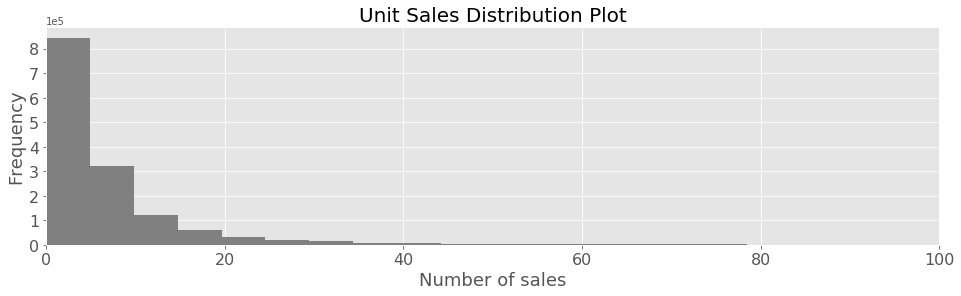

In [60]:
df_train.unit_sales.plot(
    kind='hist',
    bins=1000,
    figsize=(16, 4), 
    fontsize=16,
    xlim=[0, 100],
    color='grey')

plt.ticklabel_format(style='sci', scilimits=(0,0), axis='y')
plt.xlabel('Number of sales', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Unit Sales Distribution Plot', fontsize=20)
plt.show()

## Test set

In [38]:
df_test = pd.read_csv('test.csv')

print('Size of test set: {} rows and {} columns'.format(*df_test.shape))
df_test.head()

Size of test set: 3370464 rows and 5 columns


,id,date,store_nbr,item_nbr,onpromotion
0,125497040,2017-08-16,1,96995,False
1,125497041,2017-08-16,1,99197,False
2,125497042,2017-08-16,1,103501,False
3,125497043,2017-08-16,1,103520,False
4,125497044,2017-08-16,1,103665,False


In [40]:
df_test.date = pd.to_datetime(df_test.date)

In [43]:
pd.Timedelta(df_test.date.max() - df_test.date.min())

Timedelta('15 days 00:00:00')